In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# tensorflow 2.0
from tensorflow.keras.models import load_model  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense       
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers 

# sklearn => useful for pre-process
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print(tf.__version__)

2.0.0


In [2]:
# Read CSV file
df = pd.read_csv('./CancerSurvival_1.csv', header=None)
print(type(df))
print(df.head(5))
print(df.info())

data = np.loadtxt('./CancerSurvival_1.csv', delimiter=",")
print(type(data))
print(data.shape)

# Type conversion: float => numpy.float64
X = data[:, 0:17].astype(float)  
Y = data[:, 17]

print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
    0   1     2     3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0  293   1  3.80  2.80   0   0   0   0   0   0  12   0   0   0   1   0  62   0
1    1   2  2.88  2.16   1   0   0   0   1   1  14   0   0   0   1   0  60   0
2    8   2  3.19  2.50   1   0   0   0   1   0  11   0   0   1   1   0  66   1
3   14   2  3.98  3.06   2   0   0   0   1   1  14   0   0   0   1   0  80   1
4   17   2  2.21  1.88   0   0   1   0   0   0  12   0   0   0   1   0  56   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
0     470 non-null int64
1     470 non-null int64
2     470 non-null float64
3     470 non-null float64
4     470 non-null int64
5     470 non-null int64
6     470 non-null int64
7     470 non-null int64
8     470 non-null int64
9     470 non-null int64
10    470 non-null int64
11    470 non-null int64
12    470 non-null int64
13    470 non-null int64
14    470 non-null int64
15  

In [3]:
seed = 0

# split data => test 90%, validation 10%
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                            stratify=Y,
                                                            test_size=0.1,
                                                            random_state=seed)
# split test data(85%) => test 90%, validation 10%
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)
print(y_val)
print(y_val.shape) 

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(43,)


In [4]:
model = Sequential()

model.add(Dense(64, input_shape=(17, ), activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(16, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=5)
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, 
                 batch_size=5, callbacks=[early_stopping])

Train on 380 samples, validate on 43 samples
Epoch 1/1000
380/380 [==============================] - 1s 3ms/sample - loss: 1.2109 - accuracy: 0.8079 - val_loss: 0.9136 - val_accuracy: 0.8605
Epoch 2/1000
380/380 [==============================] - 0s 340us/sample - loss: 0.9597 - accuracy: 0.8263 - val_loss: 1.3127 - val_accuracy: 0.8605
Epoch 3/1000
380/380 [==============================] - 0s 289us/sample - loss: 0.8181 - accuracy: 0.8263 - val_loss: 0.7307 - val_accuracy: 0.8372
Epoch 4/1000
380/380 [==============================] - 0s 305us/sample - loss: 0.8356 - accuracy: 0.8316 - val_loss: 0.8736 - val_accuracy: 0.8605
Epoch 5/1000
380/380 [==============================] - 0s 351us/sample - loss: 0.8156 - accuracy: 0.8184 - val_loss: 0.8518 - val_accuracy: 0.8605
Epoch 6/1000
380/380 [==============================] - 0s 336us/sample - loss: 0.7617 - accuracy: 0.8500 - val_loss: 0.7346 - val_accuracy: 0.8605
Epoch 7/1000
380/380 [==============================] - 0s 316us/samp

Epoch 56/1000
380/380 [==============================] - 0s 318us/sample - loss: 0.5254 - accuracy: 0.8500 - val_loss: 0.5425 - val_accuracy: 0.8605
Epoch 57/1000
380/380 [==============================] - 0s 295us/sample - loss: 0.5275 - accuracy: 0.8500 - val_loss: 0.5362 - val_accuracy: 0.8605
Epoch 58/1000
380/380 [==============================] - 0s 294us/sample - loss: 0.5273 - accuracy: 0.8500 - val_loss: 0.5352 - val_accuracy: 0.8605


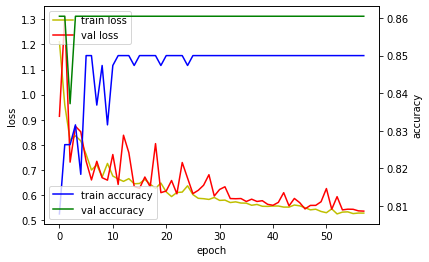

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


In [5]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
#acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()
model.summary()

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('Loss:', test_loss, '/Accuracy:', (test_acc*100), '%')

Loss: 0.5311421377861754 /Accuracy: 85.10638475418091 %


In [7]:
model.save('./CancerSurvival.h5')

# Model Reuse

In [17]:
import warnings
warnings.filterwarnings(action='ignore')

model2 = load_model('./CancerSurvival.h5')


In [9]:
x_data2 = np.array([
[293,1,3.8,2.8,0,0,0,0,0,0,12,0,0,0,1,0,62],
[1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60],
[8,2,3.19,2.5,1,0,0,0,1,0,11,0,0,1,1,0,66],
[14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80],
[17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56],
[18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61],
[35,2,2.76,2.2,1,0,0,0,1,0,11,0,0,0,0,0,76],
[42,2,3.24,2.52,1,0,0,0,1,0,12,0,0,0,1,0,63],
[65,2,3.15,2.76,1,0,1,0,1,0,12,0,0,0,1,0,59],
[111,2,4.48,4.2,0,0,0,0,0,0,12,0,0,0,1,0,55]
])

y_data2 = np.array([[0],
                        [0],
                        [1],
                        [1],
                        [0],
                        [0],
                        [0],
                        [1],
                        [0],
                        [0]])

print(x_data2[0:17]) 

[[293.     1.     3.8    2.8    0.     0.     0.     0.     0.     0.
   12.     0.     0.     0.     1.     0.    62.  ]
 [  1.     2.     2.88   2.16   1.     0.     0.     0.     1.     1.
   14.     0.     0.     0.     1.     0.    60.  ]
 [  8.     2.     3.19   2.5    1.     0.     0.     0.     1.     0.
   11.     0.     0.     1.     1.     0.    66.  ]
 [ 14.     2.     3.98   3.06   2.     0.     0.     0.     1.     1.
   14.     0.     0.     0.     1.     0.    80.  ]
 [ 17.     2.     2.21   1.88   0.     0.     1.     0.     0.     0.
   12.     0.     0.     0.     1.     0.    56.  ]
 [ 18.     2.     2.96   1.67   0.     0.     0.     0.     0.     0.
   12.     0.     0.     0.     1.     0.    61.  ]
 [ 35.     2.     2.76   2.2    1.     0.     0.     0.     1.     0.
   11.     0.     0.     0.     0.     0.    76.  ]
 [ 42.     2.     3.24   2.52   1.     0.     0.     0.     1.     0.
   12.     0.     0.     0.     1.     0.    63.  ]
 [ 65.     2.     3.15  

In [18]:
y_predict = model2.predict(x_data2)
print(y_predict.shape)
print(type(y_predict))
print(y_predict)

for i in range(len(x_data2)):
    print('Actual=', y_data2[i], ' => Calculated=', y_predict[i], end='')
    
    if y_predict[i] >= 0.5:
        y_predict[i] = 1
    else:
        y_predict[i] = 0
    print(' => Predicted:', int(y_predict[i]))

(10, 1)
<class 'numpy.ndarray'>
[[0.16114113]
 [0.28222752]
 [0.25569224]
 [0.21772844]
 [0.26417843]
 [0.25144297]
 [0.19586492]
 [0.2195184 ]
 [0.22984205]
 [0.24931097]]
Actual= [0]  => Calculated= [0.16114113] => Predicted: 0
Actual= [0]  => Calculated= [0.28222752] => Predicted: 0
Actual= [1]  => Calculated= [0.25569224] => Predicted: 0
Actual= [1]  => Calculated= [0.21772844] => Predicted: 0
Actual= [0]  => Calculated= [0.26417843] => Predicted: 0
Actual= [0]  => Calculated= [0.25144297] => Predicted: 0
Actual= [0]  => Calculated= [0.19586492] => Predicted: 0
Actual= [1]  => Calculated= [0.2195184] => Predicted: 0
Actual= [0]  => Calculated= [0.22984205] => Predicted: 0
Actual= [0]  => Calculated= [0.24931097] => Predicted: 0


In [19]:
data = "10, 1, 3.8, 2.8, 1, 2, 1, 2, 2, 0, 12, 0, 1, 1, 1, 0, 62"
data = np.array(data.split(','), dtype=float) 

# <class 'numpy.ndarray'>
print(type(data)) 
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(17,)
[10.   1.   3.8  2.8  1.   2.   1.   2.   2.   0.  12.   0.   1.   1.
  1.   0.  62. ]


In [20]:
# increase dimension
x_data3 = np.array([
    data,
])

print(type(x_data3))
print(x_data3.shape) # (1, 17)
print(x_data3)

<class 'numpy.ndarray'>
(1, 17)
[[10.   1.   3.8  2.8  1.   2.   1.   2.   2.   0.  12.   0.   1.   1.
   1.   0.  62. ]]


In [21]:
print(x_data3.shape)
print(x_data3[0:1].shape)
print(x_data3[0].shape)
print(type(x_data3[0]))

(1, 17)
(1, 17)
(17,)
<class 'numpy.ndarray'>


In [22]:
y_predict = model2.predict(x_data3)

print(y_predict.shape)
print(type(y_predict))
print(y_predict)

for i in range(len(x_data3)):
    print('survival rate=', y_predict[i], end='')
    
    if y_predict[i] >= 0.5:
        print(' → survived')
        res = 'Survived'
    else:
        print(' → dead');
        res = 'Dead'


(1, 1)
<class 'numpy.ndarray'>
[[0.2610618]]
survival rate= [0.2610618] → dead
